# Bibliotecas 


In [2]:
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 #instalando Pytorch com suporte a GPU
#testando a instalacao 
#import torch
#print(torch.__version__)  # Deve exibir a versão do PyTorch instalada
#print(torch.cuda.is_available())  # Deve retornar True se a GPU estiver funcionando
#print(torch.cuda.get_device_name())  # exibe sua placa de video


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    precision_score, recall_score, balanced_accuracy_score, matthews_corrcoef, 
    f1_score, accuracy_score, roc_curve, auc, 
)
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import logging
import warnings
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, log_loss, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tqdm import tqdm  
from sklearn.metrics import confusion_matrix
import seaborn as sns

########################### para KAGGLE ################################################################################################################
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
########################################################################################################################################################

# Dicinário de Dados 


| **Variável**         | **Tipo**   | **Descrição**                                                                                                                                     |
|-----------------------|------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| RowNumber            | int64      | Número do registro (linhas), sem efeito na construção de modelos.                                                                                |
| CustomerId           | int64      | ID do cliente, sem efeito sobre o estudo.                                                                                                       |
| Surname              | object     | Sobrenome do cliente, sem impacto na análise.                                                                                                   |
| CreditScore          | int64      | Pontuação de crédito, pode indicar tendência de permanência de clientes com pontuação alta.                                                     |
| Geography            | object     | Localização do cliente, pode influenciar a decisão de evasão.                                                                                   |
| Gender               | object     | Gênero do cliente, possível influência na evasão.                                                                                               |
| Age                  | int64      | Idade do cliente, clientes mais velhos tendem a permanecer.                                                                                     |
| Tenure               | int64      | Anos que o cliente está no banco, clientes novos têm maior chance de evasão.                                                                    |
| Balance              | float64    | Saldo na conta, pessoas com saldos altos são menos propensas a sair.                                                                            |
| NumOfProducts        | int64      | Número de produtos adquiridos pelo cliente.                                                                                                    |
| HasCrCard            | int64      | Indica se o cliente tem cartão de crédito, clientes com cartão são menos propensos à evasão.                                                    |
| IsActiveMember       | int64      | Clientes ativos têm menor chance de evasão.                                                                                                    |
| EstimatedSalary      | float64    | Salário estimado, clientes com salários mais altos tendem a permanecer.                                                                         |
| Exited               | int64      | Indica se o cliente saiu ou não do banco, variável de predição (“churn”).                                                                       |
| Complain             | int64      | Indica se o cliente fez reclamação.                                                                                                             |
| Satisfaction Score   | int64      | Pontuação de satisfação com a resolução de reclamação.                                                                                          |
| Card Type            | object     | Tipo de cartão que o cliente possui.                                                                                                            |
| Points Earned        | int64      | Pontos ganhos pelo cliente.                                                                                                                     |


#  Análise Exploratória (EDA) & Data Prep

Primeiras linhas para primeiro contato com a base de dados 


In [4]:

# base_original = pd.read_csv('/kaggle/input/Customer-Churn-Records.csv', sep=',') #KAGGLE
base_original = pd.read_csv('C:/Users/jgeov/iCloudDrive/Treinamento/Treinamento Data Science/Projetos/Customer-Churn-Records.csv',sep=',') #LOCAL

#configs para nao quebrar linhas no print do  df
pd.set_option('display.expand_frame_repr', False) 
pd.set_option('display.max_columns', None)

#primeiras linhas 
base_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Dimensões, Tipos e checagem de missing values (nulos)

In [5]:
#Dimensões 
print("Numero de linhas:", base_original.shape[0]) 
print("Numero de colunas:", base_original.shape[1])

Numero de linhas: 10000
Numero de colunas: 18


In [6]:
#tipos
base_original.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
#checando se há valores nulos 
base_original.isnull().sum()  
#valores nulos nao encontrados 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

* Limpando variaveis inuteis para analise
* Resumo estatistico de veriaveis quantitativas


In [8]:
#removidas por serem meramente identificadoras: RowNumber, CustomerId e Surname 

df = base_original[['CreditScore',
                    'Gender',
                    'Geography',
                    'Age',
                    'Tenure',
                    'Balance',
                   'NumOfProducts',
                    'HasCrCard',
                    'IsActiveMember',
                   'EstimatedSalary',
                    'Complain',
                    'Satisfaction Score',
                   'Card Type',
                    'Point Earned',
                    'Exited'
                   ]]

# Resumo estatístico 
quanti = df[['EstimatedSalary', 'Balance', 'CreditScore', 'Age', 'Tenure', 'Point Earned']]
resumo_estati_quant = quanti.describe().style.format(lambda x: f'{x:,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.')) # Formatação com 1 casa decimal e separadores invertidos

resumo_estati_quant

,EstimatedSalary,Balance,CreditScore,Age,Tenure,Point Earned
count,"10.000,0","10.000,0","10.000,0","10.000,0","10.000,0","10.000,0"
mean,"100.090,2","76.485,9","650,5","38,9","5,0","606,5"
std,"57.510,5","62.397,4","96,7","10,5","2,9","225,9"
min,"11,6","0,0","350,0","18,0","0,0","119,0"
25%,"51.002,1","0,0","584,0","32,0","3,0","410,0"
50%,"100.193,9","97.198,5","652,0","37,0","5,0","605,0"
75%,"149.388,2","127.644,2","718,0","44,0","7,0","801,0"
max,"199.992,5","250.898,1","850,0","92,0","10,0","1.000,0"


* Resumo estatistico de variaveis qualitativas (frequancias)

* Os resumos estatisticos sao importantes para primeiras nocoes de desbalance, a amplitude e distribuicao de valores
minimos maximos e um breve entendimento se serao necessarios tratamentos nessas variaveis, decorrentes dessas observacoes; 

* Podemos notar que a principio as ditribuicoes nao sao absurdas e o desbalance esta pricipalemnte nas variavies Complain e Exited (variavel alvo do estudo, a chamaremos de churn) indicando que sera necessario tratar isso;

* Franca tem mais observacoes que os demais paises; 

* A maioria dos clientes tem cartao de credito; 

* A maioria dos clientes tem entre 1 e 2 produtos. 


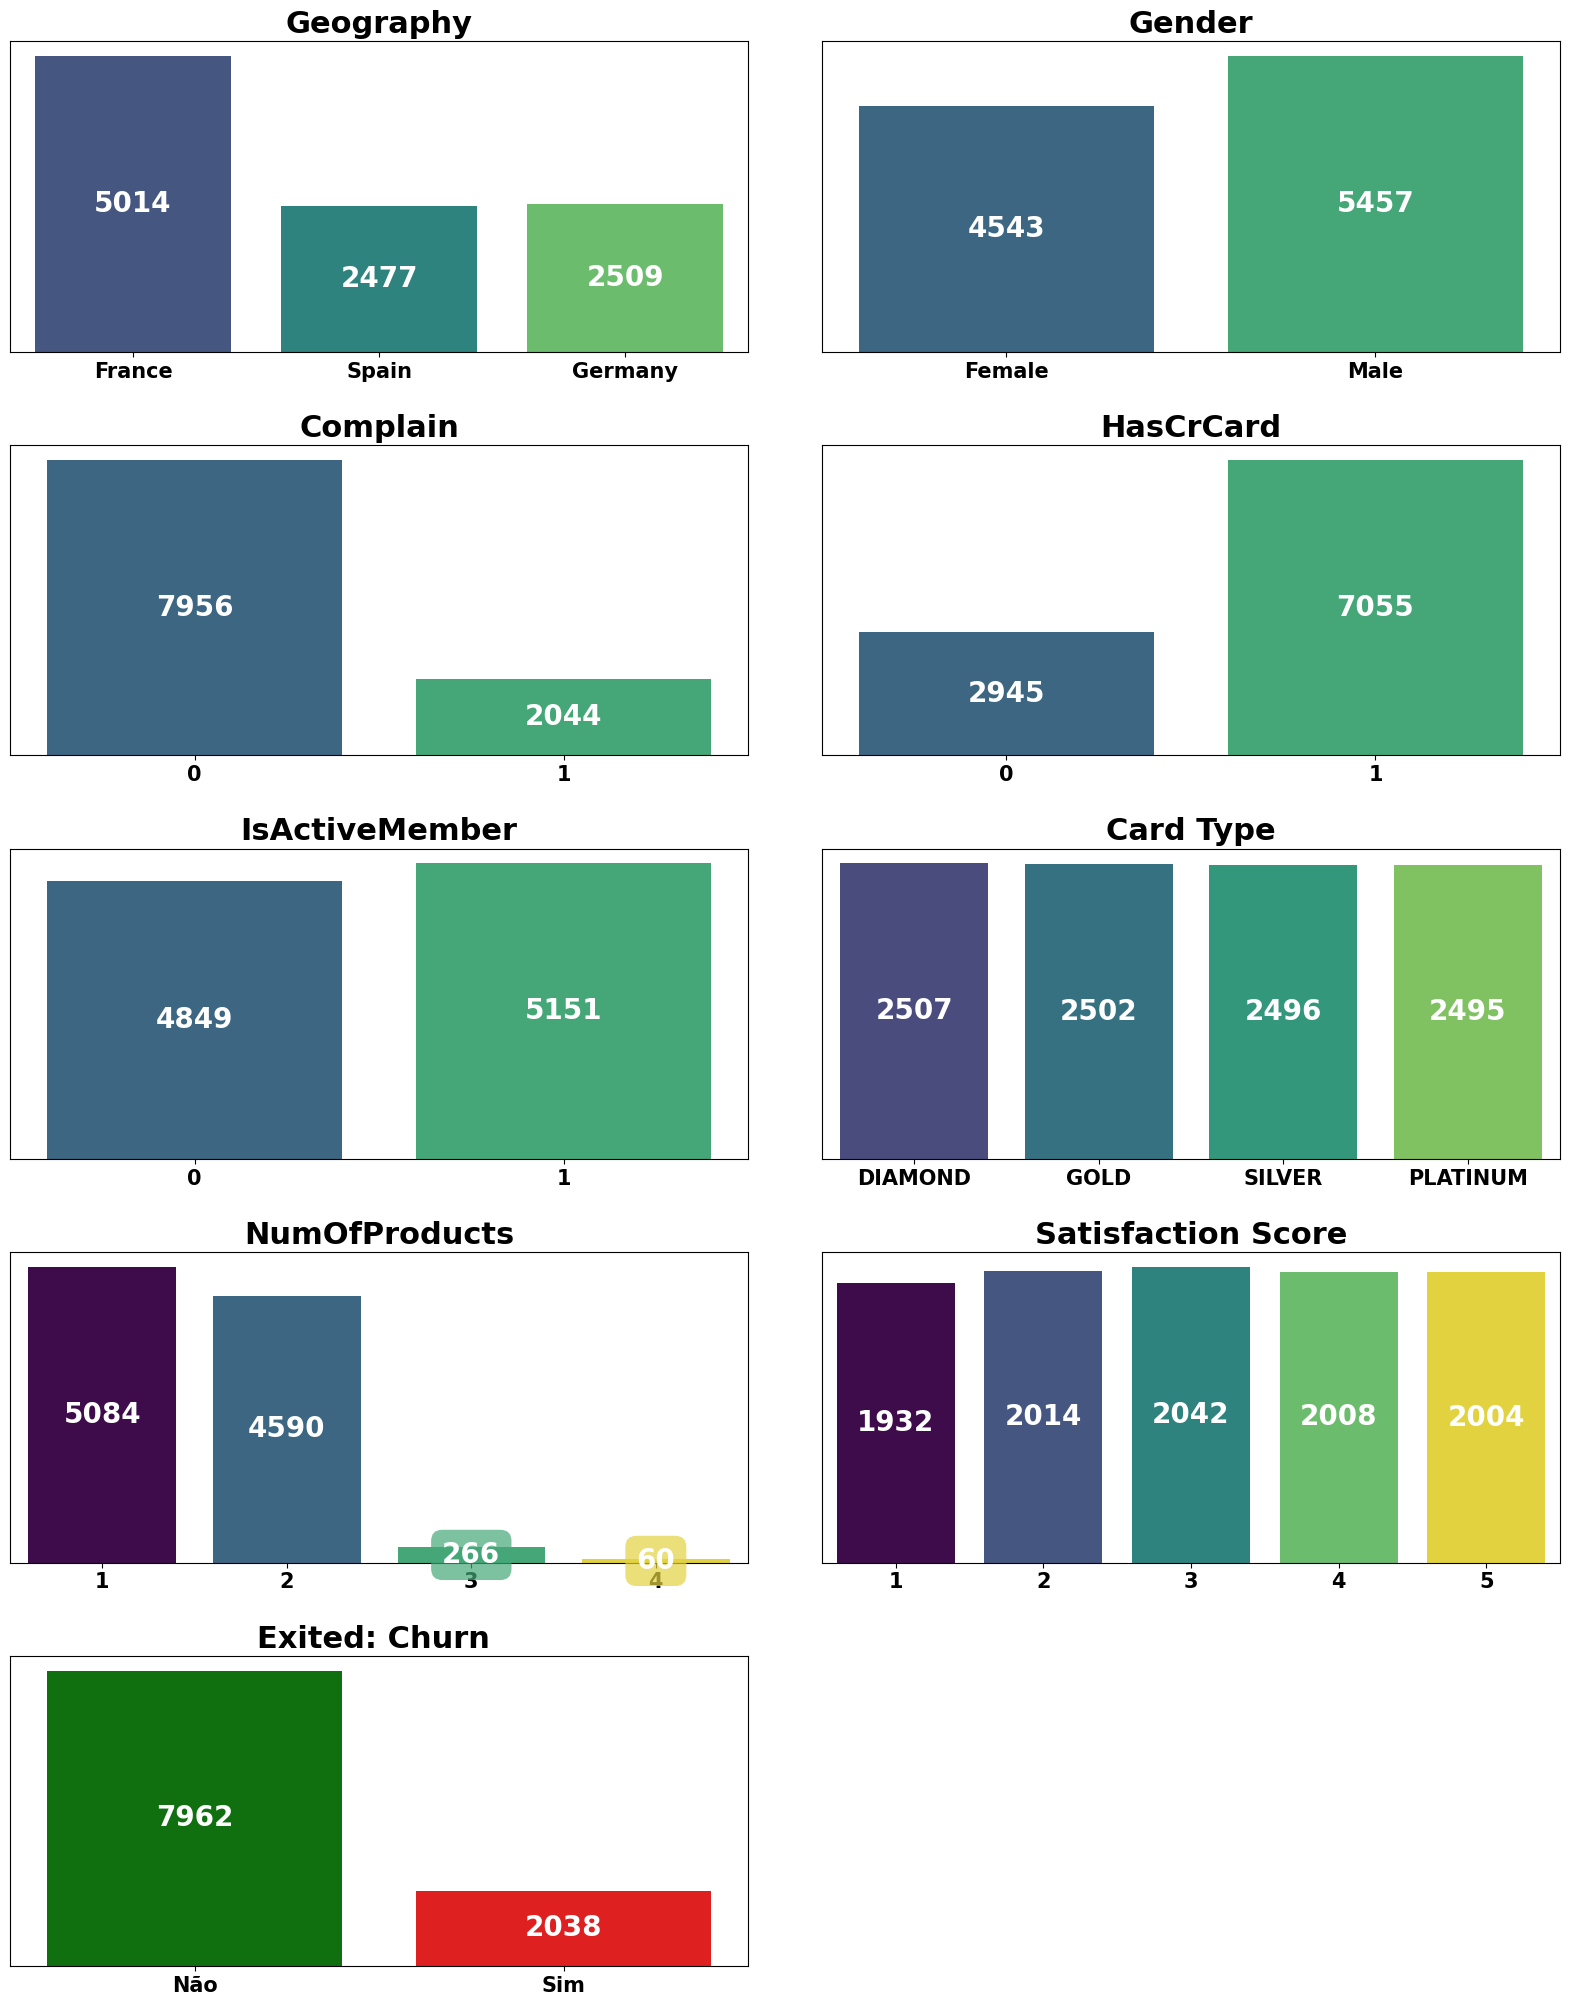

In [9]:
#Resumo estatistico 

#separando quali's para analise 
quali = df[['HasCrCard', 'IsActiveMember', 'Geography','Gender'
            ,'Complain','Exited','Card Type','NumOfProducts','Satisfaction Score']]

quali = quali.astype('object')

#quali.dtypes



def add_value_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        color = p.get_facecolor()
        ax.text(p.get_x() + p.get_width() / 2., height / 2.,
                f'{int(height)}',
                ha='center', va='center', fontsize=20, color='white', fontweight='bold',
                bbox=dict(facecolor=color, edgecolor='none', alpha=0.7,
                          boxstyle='round,pad=0.4', linewidth=1))

plt.figure(figsize=(20, 25))

# Geography
plt.subplot(5, 2, 1)
ax1 = plt.gca()
ax1.set_title('Geography', fontsize=22, fontweight='bold')
sns.countplot(x='Geography', hue='Geography', palette='viridis', data=base_original, ax=ax1, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax1)

# Gender
plt.subplot(5, 2, 2)
ax2 = plt.gca()
ax2.set_title('Gender', fontsize=22, fontweight='bold')
sns.countplot(x='Gender', hue='Gender', palette='viridis', data=base_original, ax=ax2, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax2)

# Complain
plt.subplot(5, 2, 3)
ax10 = plt.gca()
ax10.set_title('Complain', fontsize=22, fontweight='bold')
sns.countplot(x='Complain', hue='Complain', palette='viridis', data=base_original, ax=ax10, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax10)

# HasCrCard
plt.subplot(5, 2, 4)
ax5 = plt.gca()
ax5.set_title('HasCrCard', fontsize=22, fontweight='bold')
sns.countplot(x='HasCrCard', hue='HasCrCard', palette='viridis', data=base_original, ax=ax5, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax5)

# IsActiveMember
plt.subplot(5, 2, 5)
ax6 = plt.gca()
ax6.set_title('IsActiveMember', fontsize=22, fontweight='bold')
sns.countplot(x='IsActiveMember', hue='IsActiveMember', palette='viridis', data=base_original, ax=ax6, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax6)

# Card Type
plt.subplot(5, 2, 6)
ax10 = plt.gca()
ax10.set_title('Card Type', fontsize=22, fontweight='bold')
sns.countplot(x='Card Type', hue='Card Type', palette='viridis', data=base_original, ax=ax10, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax10)


# NumOfProducts
plt.subplot(5, 2, 7)
ax10 = plt.gca()
ax10.set_title('NumOfProducts', fontsize=22, fontweight='bold')
sns.countplot(x='NumOfProducts', hue='NumOfProducts', palette='viridis', data=base_original, ax=ax10, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax10)


# Satisfaction Score
plt.subplot(5, 2, 8)
ax11 = plt.gca()
ax11.set_title('Satisfaction Score', fontsize=22, fontweight='bold')
sns.countplot(x='Satisfaction Score', hue='Satisfaction Score', palette='viridis', data=base_original, ax=ax11, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax11)






# Exited
plt.subplot(5, 2, 9)
ax11 = plt.gca()
ax11.set_title('Exited: Churn ', fontsize=22, fontweight='bold')
custom_palette = ['green', 'red']
sns.countplot(x='Exited', hue='Exited', palette=custom_palette, data=base_original, ax=ax11, legend=False)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0, fontweight='bold')
plt.yticks([])
add_value_labels(ax11)

ax11.set_xticks([0, 1])
ax11.set_xticklabels(['Não', 'Sim'], fontsize=15, fontweight='bold')

# Ajustando espaçamento
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plt.show()




* Visualizando o comportmento da variavel alvo (exited) em relacao as demais variaveis; 

* Vemos claramente que existe o disbalance de classes na variavel churn, pela cor verde presente fortemente em todas variaveis, posteriormente isso sera tratado/mitigado; 

* Ja e possivel notar um forte indicio de alta correlacao entre churn e complain, posteriormente isso sera testado. 



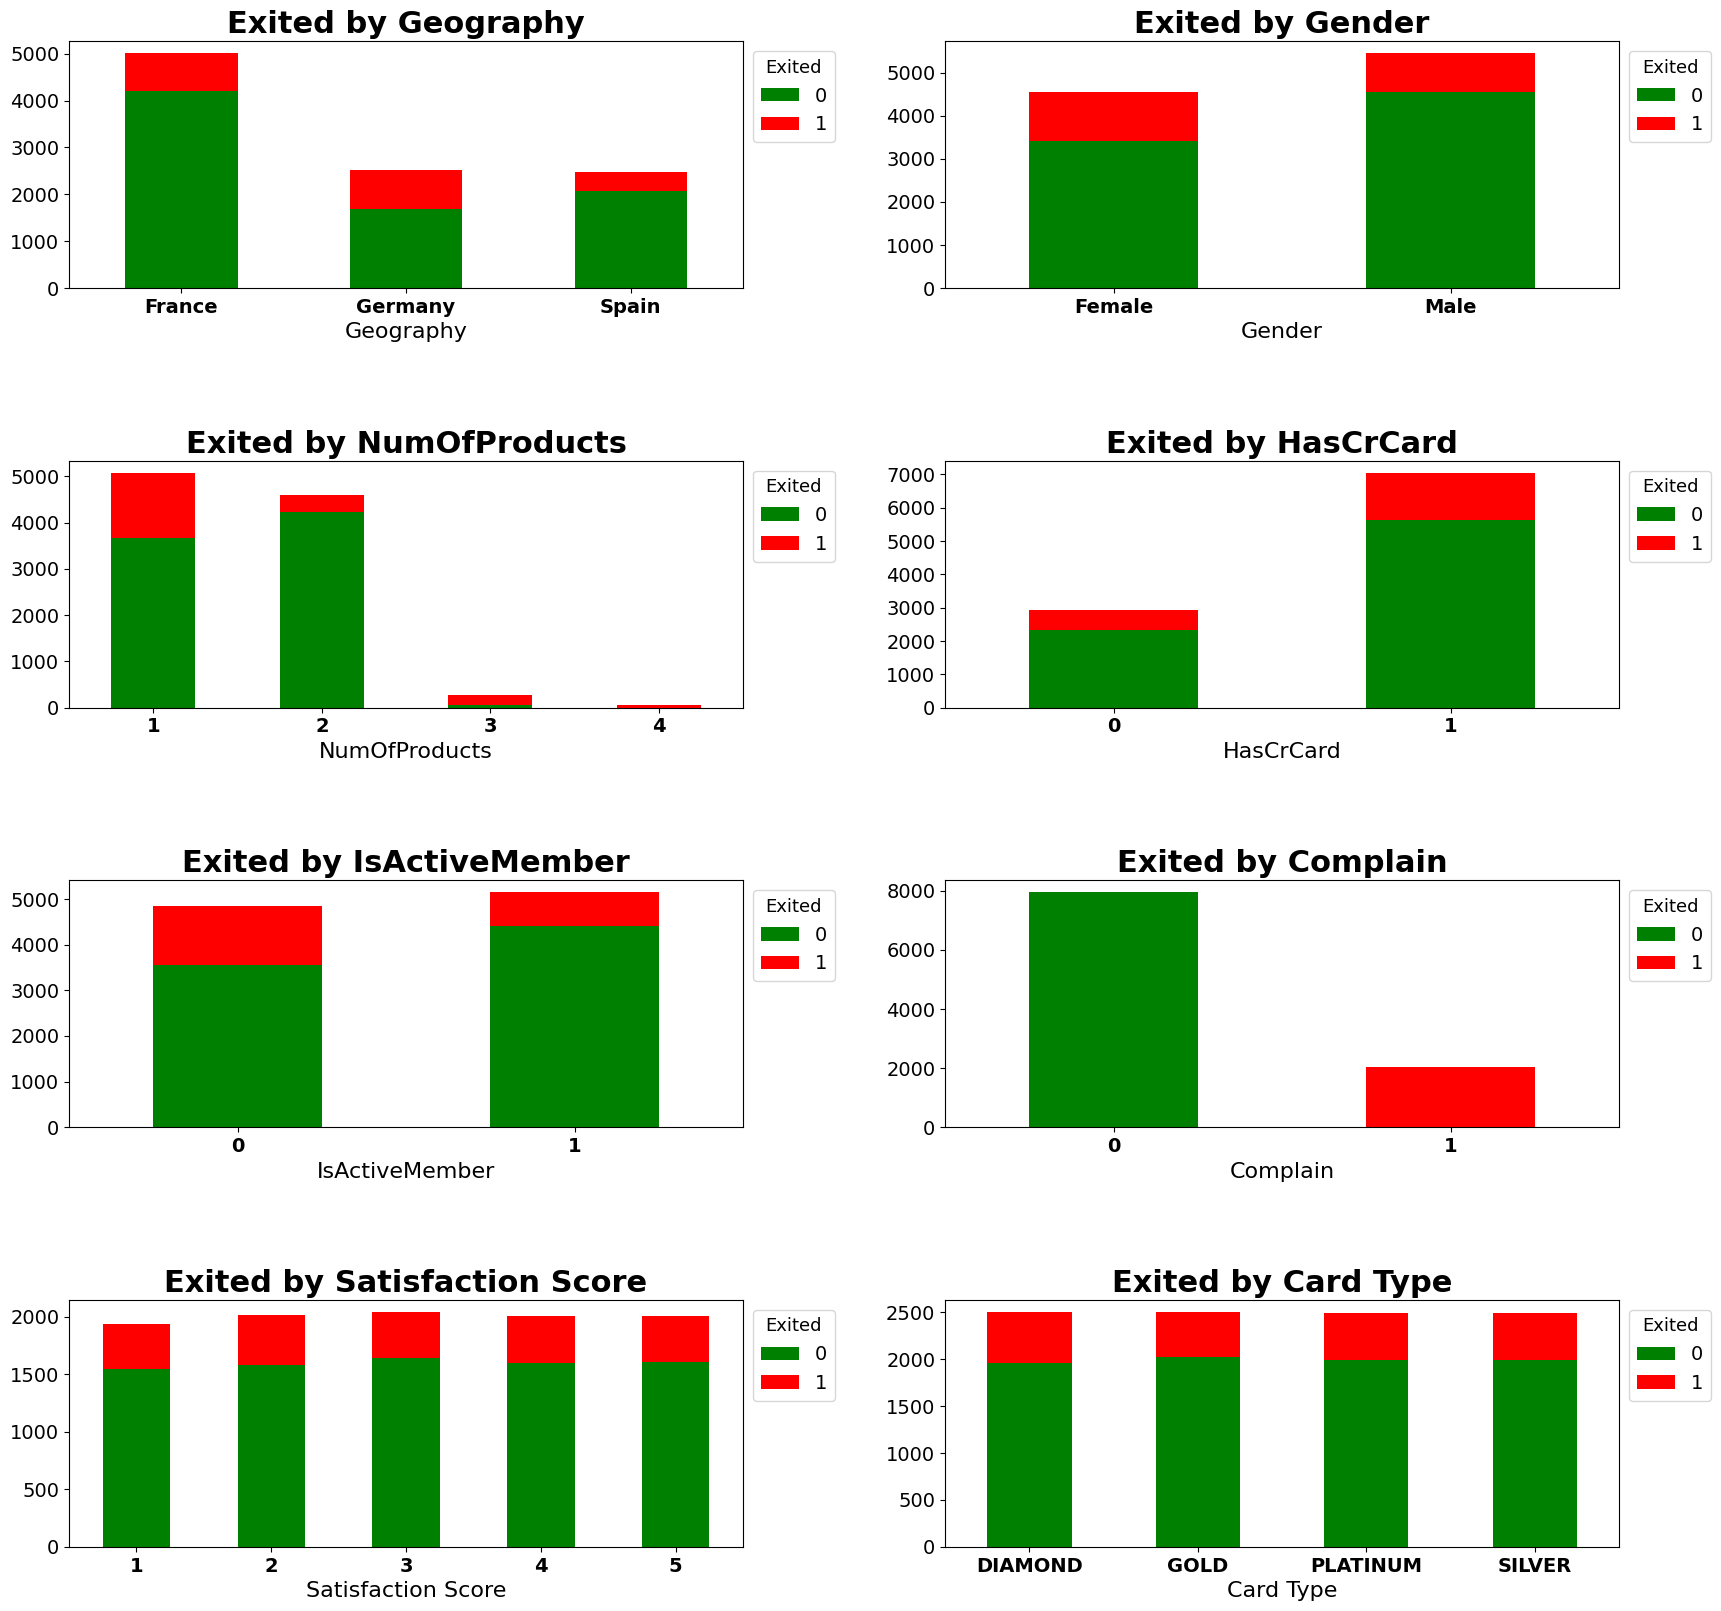

In [10]:
#%% Variável alvo em relação as demais variáveis 





plt.figure(figsize=(20, 25)) #tamanho do painel grafico

#funcao de adicao de legenda no canto superior direito e garante rotulos 
def add_legend(ax):
    
    handles, labels = ax.get_legend_handles_labels()
    if not handles:
        
        # Se não houver handles, forca a adicao
        handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['green', 'red']]
        labels = ['Not Exited', 'Exited']
        
    # Adiciona a legenda fora da área das barras
    ax.legend(handles, labels, loc='upper left', fontsize=14, title='Exited', title_fontsize='13',  
              bbox_to_anchor=(1.0, 1)) 




# Geography
plt.subplot(5, 2, 1)
counts = base_original.groupby(['Geography', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by Geography', fontsize=22, fontweight='bold')
plt.xlabel('Geography', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Gender
plt.subplot(5, 2, 2)
counts = base_original.groupby(['Gender', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca()) 
plt.title('Exited by Gender', fontsize=22, fontweight='bold')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# NumOfProducts
plt.subplot(5, 2, 3)
counts = base_original.groupby(['NumOfProducts', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by NumOfProducts', fontsize=22, fontweight='bold')
plt.xlabel('NumOfProducts', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# HasCrCard
plt.subplot(5, 2, 4)
counts = base_original.groupby(['HasCrCard', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by HasCrCard', fontsize=22, fontweight='bold')
plt.xlabel('HasCrCard', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# IsActiveMember
plt.subplot(5, 2, 5)
counts = base_original.groupby(['IsActiveMember', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca()) 
plt.title('Exited by IsActiveMember', fontsize=22, fontweight='bold')
plt.xlabel('IsActiveMember', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Complain
plt.subplot(5, 2, 6)
counts = base_original.groupby(['Complain', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by Complain', fontsize=22, fontweight='bold')
plt.xlabel('Complain', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Satisfaction Score
plt.subplot(5, 2, 7)
counts = base_original.groupby(['Satisfaction Score', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by Satisfaction Score', fontsize=22, fontweight='bold')
plt.xlabel('Satisfaction Score', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Card Type
plt.subplot(5, 2, 8)
counts = base_original.groupby(['Card Type', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by Card Type', fontsize=22, fontweight='bold')
plt.xlabel('Card Type', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Ajusta a distância entre os gráficos
plt.subplots_adjust(hspace=0.7, wspace=0.3)

# Variaveis Dummies

* A maioria dos modelos necessita de transformar as variaveis categoricas em numericas, e o modelo MLP (Multilayer Perceptron) e um deles; 

* A transformacao de categoricas em numericas precisa ser feita com processos adequados para nao cometer ponderacao arbitrária no desenvolvimento. 

* foi aplicado one-hot encoding para isso. Esse processo e chamado de "Dummizacao". 
 

In [11]:
# Dumizando

# Suprime todos os warnings de futuro (deixa mais clean) 
warnings.filterwarnings('ignore', category=FutureWarning)



# Lista de variaveis a serem transformadas
cols_to_transform = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'Card Type']

# Convertendo para string
df.loc[:, cols_to_transform] = df.loc[:, cols_to_transform].astype(str)

# one-hot encoding 
df_dummies = pd.get_dummies(df, columns=cols_to_transform, dtype=int, drop_first=False)



# variável alvo 'Exited' para o tipo numérico, pois o modelo requer isso de todas as varaiveis (por isso dumizar)
df_dummies['Exited'] = df_dummies['Exited'].astype('int64')

print(df_dummies.dtypes)

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Exited                  int64
HasCrCard_0             int32
HasCrCard_1             int32
IsActiveMember_0        int32
IsActiveMember_1        int32
Geography_France        int32
Geography_Germany       int32
Geography_Spain         int32
Gender_Female           int32
Gender_Male             int32
Card Type_DIAMOND       int32
Card Type_GOLD          int32
Card Type_PLATINUM      int32
Card Type_SILVER        int32
dtype: object


# Separação Treino e Teste & Adicao de Features quadráticas

* A separacao em treino e teste alem de uma boa pratica e extreamente necessario na construcao de modelos de machine learning; 

* Tambem foram adicionadas variaveis quadraticas, ou seja, com operacao matematica aplicadas em variaveis originais gerando novas variaveis. Isso foi feito para capturar algum tipo de comportamento nao linear; 

* Foi considerado aplicar transformacao polinomial nas variaveis, por isso foi primeiro aplicado o termo quadratico, que nao apresentou melhoria significativa a ponto de aplicarmos polinomias; 

* Alem disso MLPs capturam naturalmente comportamentos nao lineares. O termo quadratico foi util para validacao durante o estudo mas a melhoria foi baixa, por isso mantemos apenas os termos quadraticos sem incluir interacoes entre variaveis (seria aplicacao Polinomias completo); 



* Tambem e possivel notar o desbalanceamento das classes  nas bases tanto em treino quanto em teste no grafico final; 

* Tambem garantimos a mesma proporcao (80/20) tanto em treino quanto em teste na separacao das bases , ou seja, equidade de divisao de dados e equilibrio. 


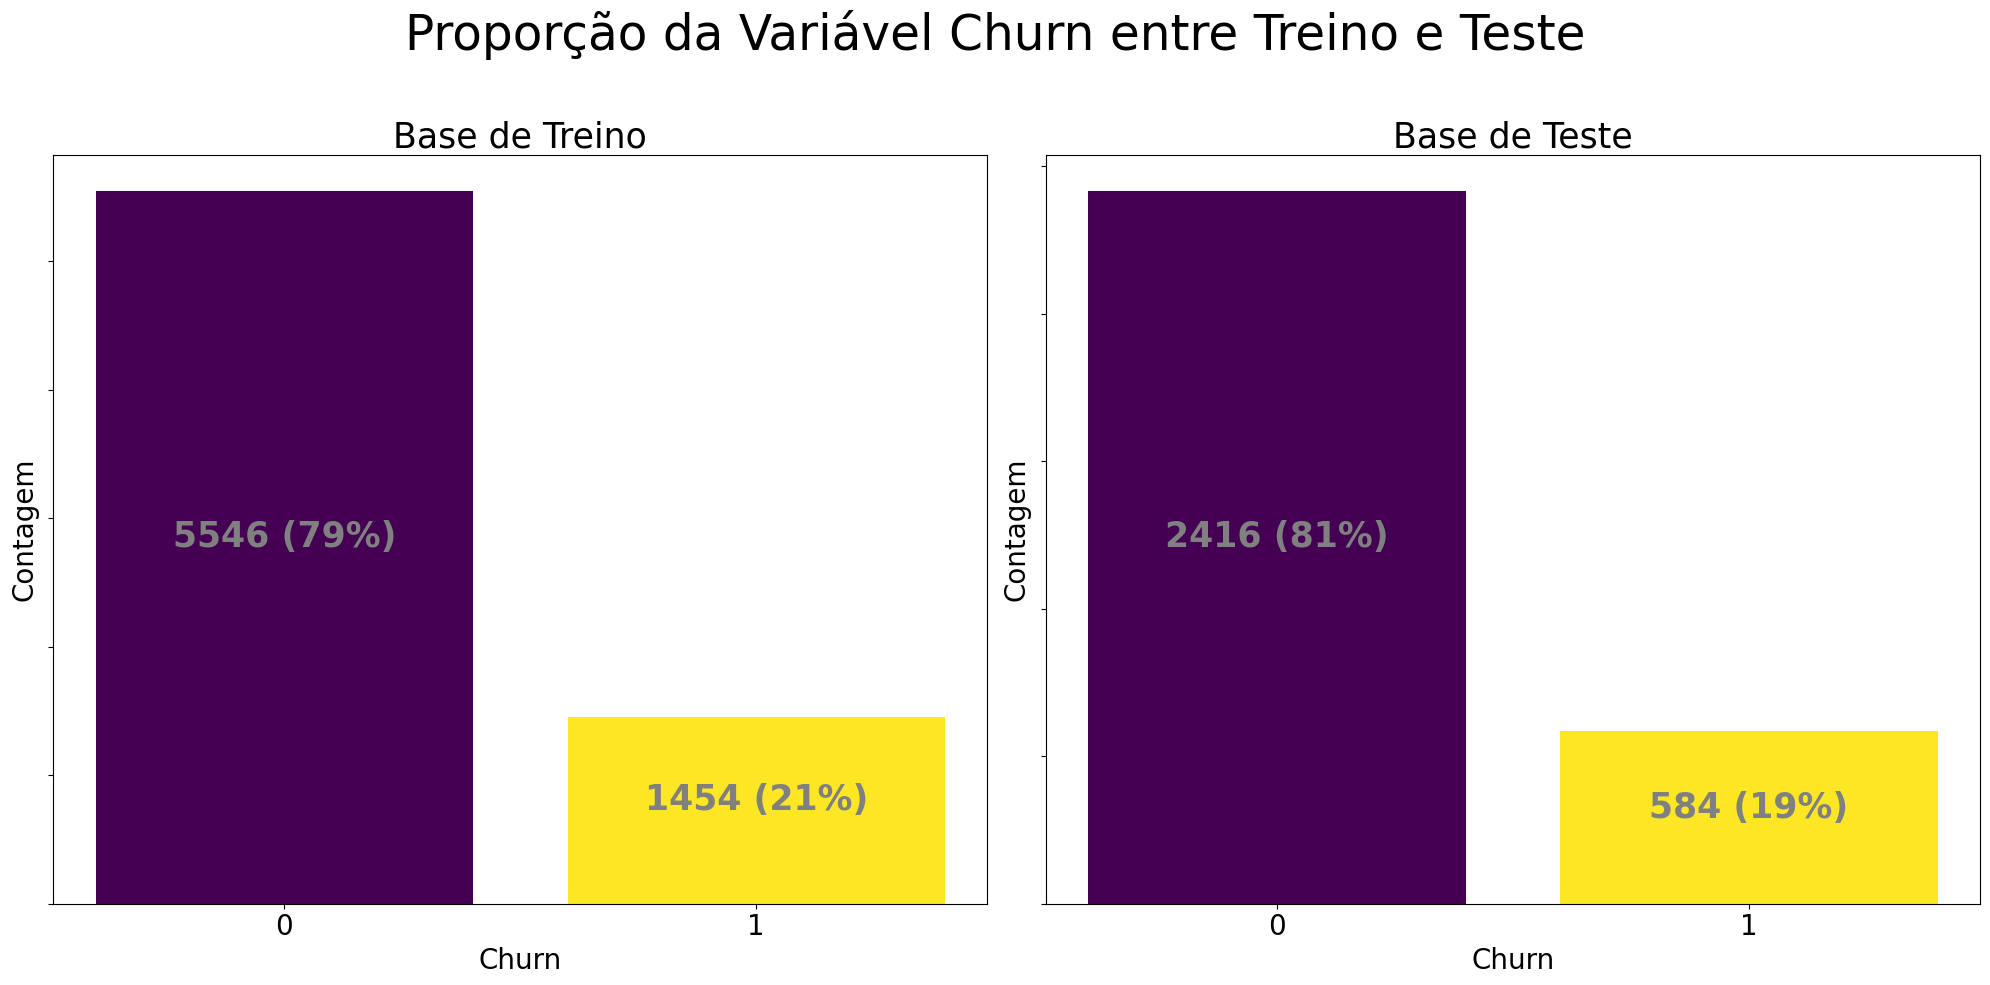

In [12]:
#X ---> Variáveis explicativas 
#Y ---> Evento de estudo (variável TARGET, evento de estudo, ^y etc..)

df_dummies = df_dummies.drop(columns=['Complain'])


X = df_dummies .drop('Exited', axis=1)

# VARIAVEIS QUADRATICAS 
X['Balance_Squared'] = X['Balance'] ** 2
X['Age_Squared'] = X['Age'] ** 2
X['CreditScore_Squared'] = X['CreditScore'] ** 2
X['NumOfProducts_Squared'] = X['NumOfProducts'] ** 2
X['Tenure_Squared'] = X['Tenure'] ** 2
X['EstimatedSalary_Squared'] = X['EstimatedSalary'] ** 2



y =  df_dummies['Exited']


#separando em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Visualizando a proporção de eventos de churn (TARGET) nas bases de TREINO e TESTE 

# Contando os valores 
churn_counts_train = y_train.value_counts()
churn_counts_test = y_test.value_counts()


# plot que contem os graficos
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Proporção da Variável Churn entre Treino e Teste', fontsize=35)  
cmap = plt.get_cmap('viridis', 2) #paleta de cores



# Gráfico da base de treino
bars_train = axs[0].bar(churn_counts_train.index, churn_counts_train.values, color=cmap(range(2)))
axs[0].set_title('Base de Treino', fontsize=25)
axs[0].set_xlabel('Churn', fontsize=20)
axs[0].set_ylabel('Contagem', fontsize=20)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['0', '1'], fontsize=20)
axs[0].set_yticklabels([]) # Ocultando os valores do eixo y

# Adicionando rótulos de dados
total_train = churn_counts_train.sum()
for bar in bars_train:
    count = int(bar.get_height())
    percentage = round(count / total_train * 100)  # Arredonda a porcentagem
    label = f'{count} ({percentage}%)'  #valor absoluto e o percentual
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, 
                label, ha='center', color='gray', fontsize=25, weight='bold')




# Gráfico da base de teste
bars_test = axs[1].bar(churn_counts_test.index, churn_counts_test.values, color=cmap(range(2)))
axs[1].set_title('Base de Teste', fontsize=25)
axs[1].set_xlabel('Churn', fontsize=20)
axs[1].set_ylabel('Contagem', fontsize=20)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['0', '1'], fontsize=20)
axs[1].set_yticklabels([])# Ocultando os valores do eixo y

# Adicionando rótulos de dados
total_test = churn_counts_test.sum()
for bar in bars_test:
    count = int(bar.get_height())
    percentage = round(count / total_test * 100)  # Arredonda a porcentagem
    label = f'{count} ({percentage}%)'  #valor absoluto e o percentual
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, 
                label, ha='center', color='gray', fontsize=25, weight='bold')



# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])  # forca espaco para o titulo
plt.show()




# Verificando correlacoes depois de construcao total de features e Dummizacao 

* Verificar as correlacoes e extreammente importante, elas podem indicar a famosa multicolinearidade, que atrapalha a maioria dos modelos; 

* no caso da MLP (pelo menos a presente aplicacao) ela nao afetou, a observei com atencao, mas nao impactou. Decidi manter as variveis mesmo com multicolinearidade em algumas (nao se assuste). 



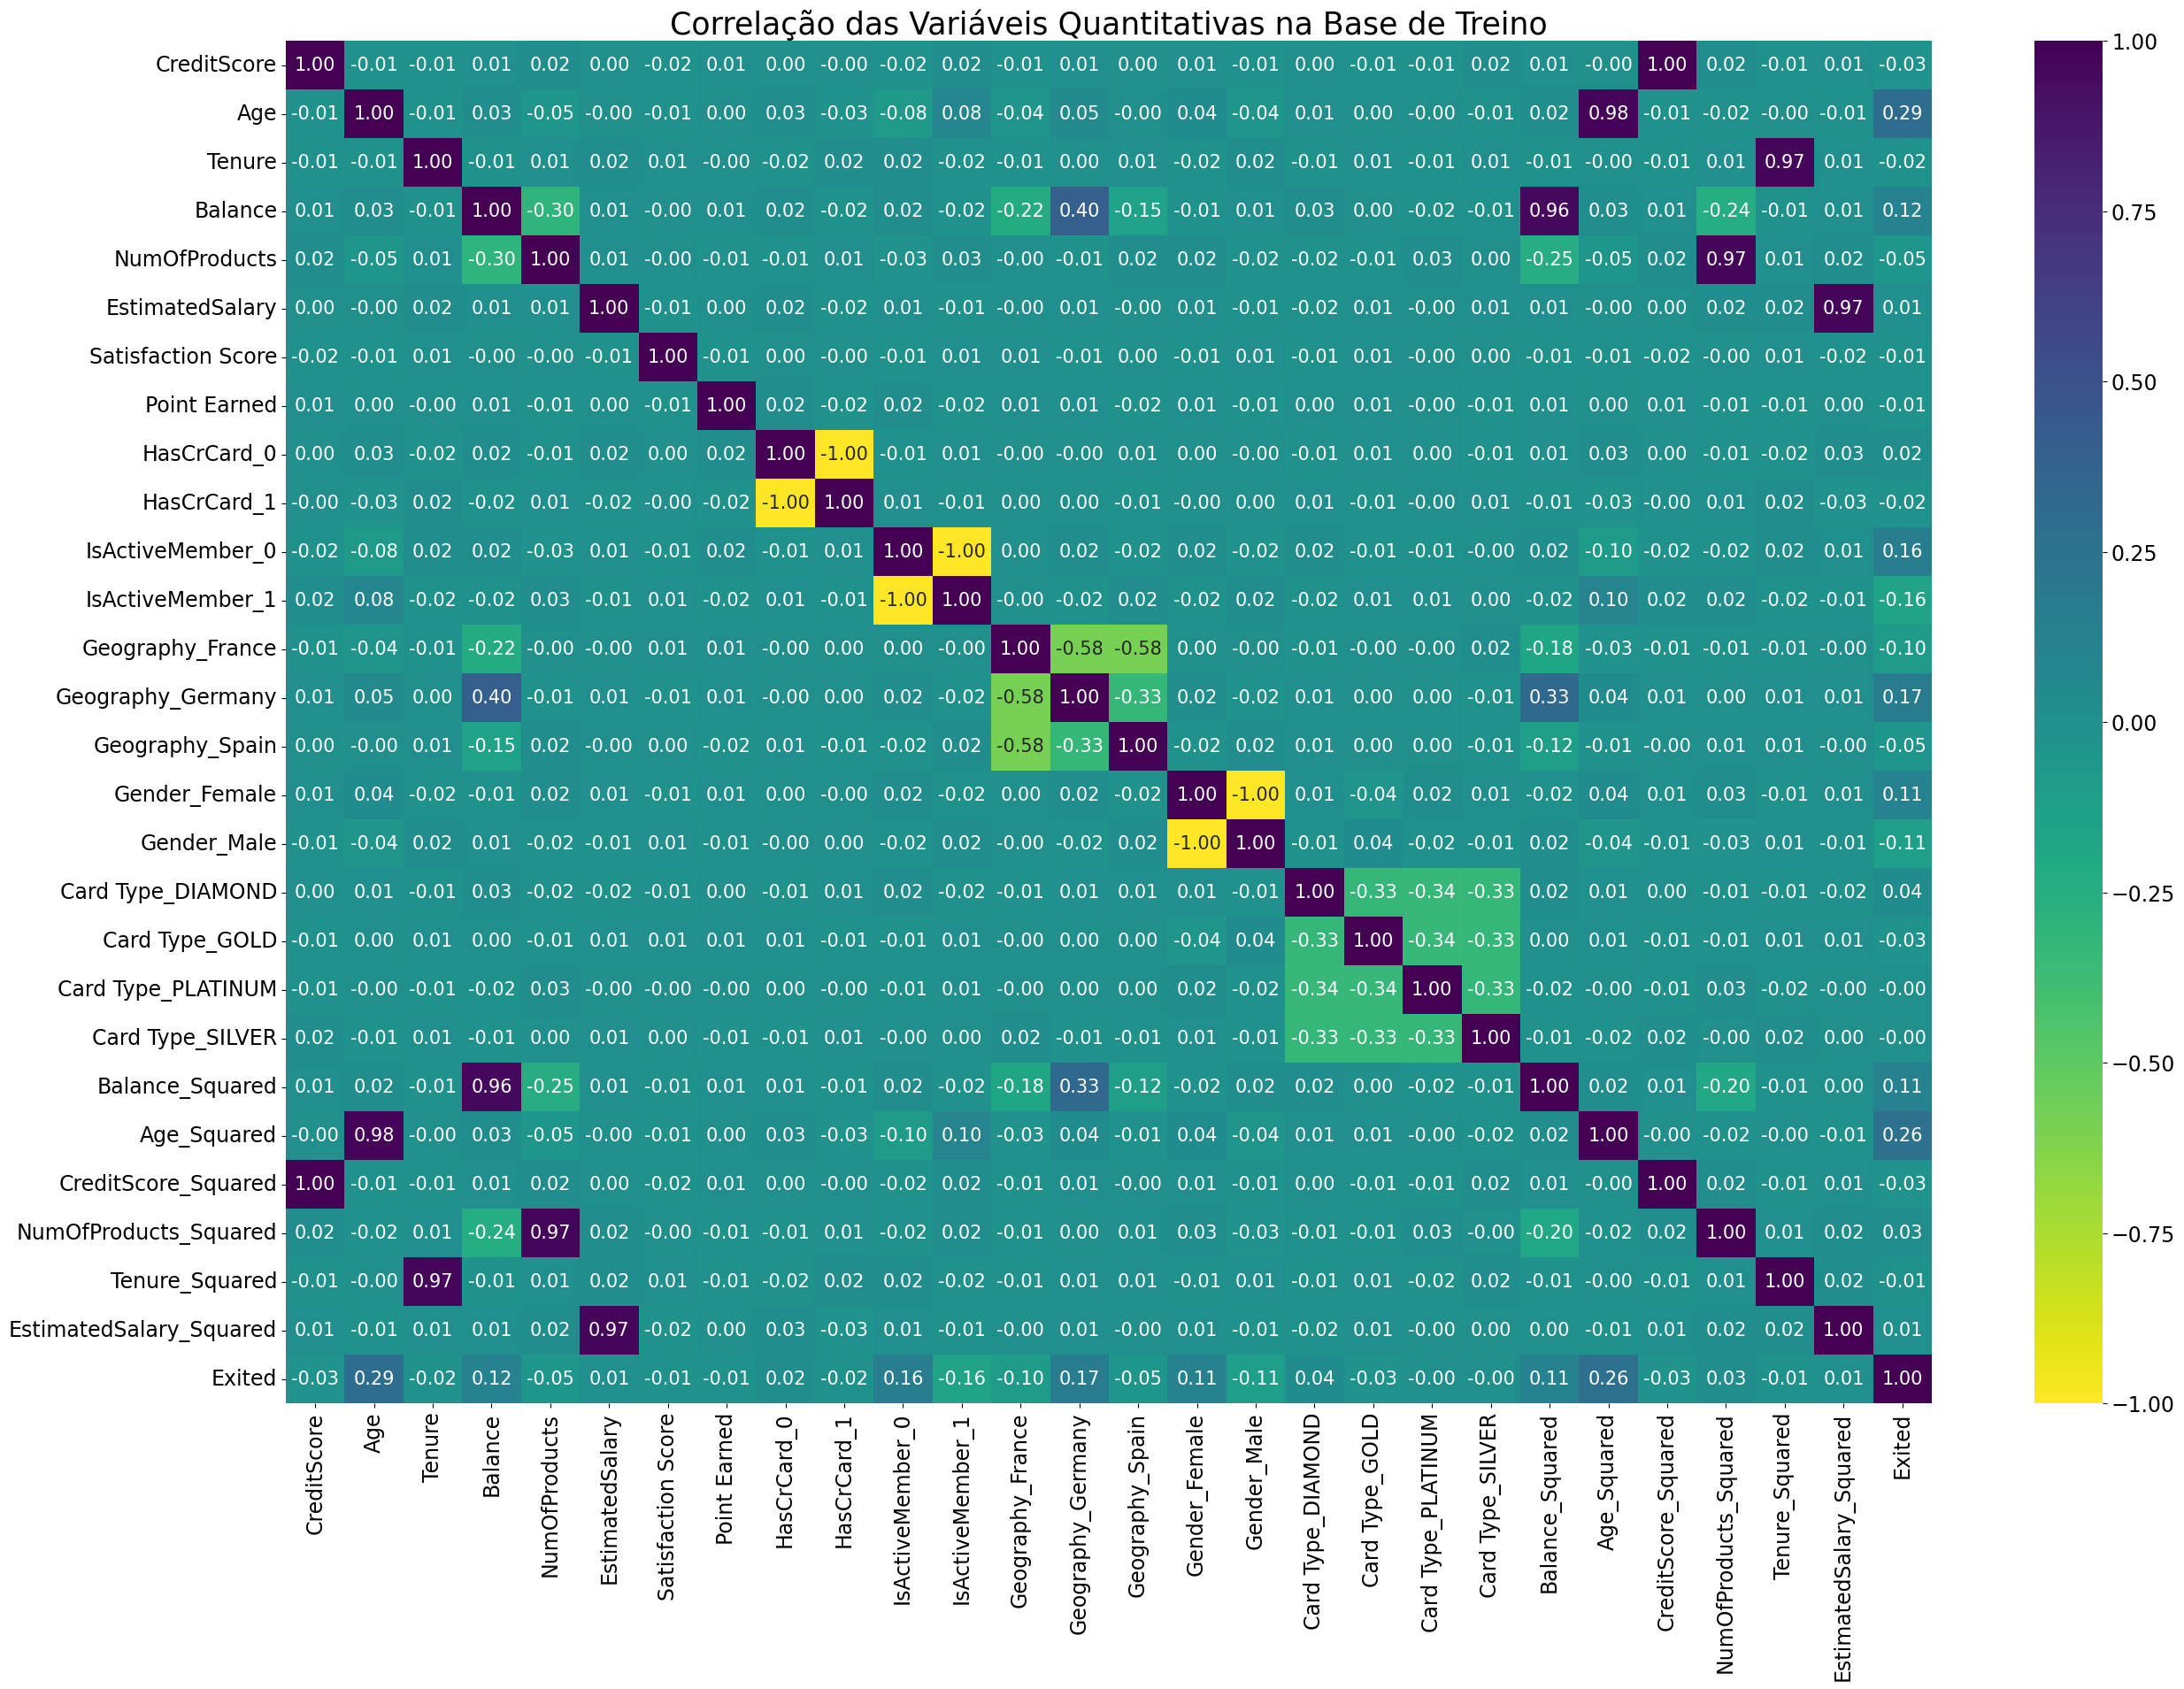

In [13]:
#Observando Multicolinearidade na base de treino

teste_multco_treino = pd.concat([X_train,y_train], axis = 1)

correlation_matrix_treino = teste_multco_treino.corr().round(2)
correlation_matrix_treino

# Matrix com  mapa de calor 
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(correlation_matrix_treino, annot=True, fmt=".2f",
                      cmap=plt.cm.viridis_r, # paleta de cores viridis (ou viridis_r para o inverso de cores) é uma paleta especial 
                                             # para facilitar a visualizacao por pessoas com dificuldades visuais, como os daltonicos. 
                      annot_kws={'size': 15}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=17)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)
plt.title('Correlação das Variáveis Quantitativas na Base de Treino',fontsize=25)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

# Analise e tratamento de Outliers 

* Outliers sao numericos e podem afetar de diversas formas modelos de MLP porque eles utilizam backpropagation e descida do gradiente, entre outras coisas que podem atrapalhar a capacidade preditiva do modelo; 

* para resolver sem perder dados, pois temos poucas observcoes para estudo, nao foram removidos como facilmente poderia fazer-se, ao inves foi aplicado winsorization; 

* winsorization e uma tecnica de limitacao dos outliers, ela substiui os valores de outlierns pelos limites superiores e inferiores; 

* Para isso, e calculado um intervalo de valores aceitos com base no primeiro quartil (Q1) e no terceiro quartil (Q3), valores abaixo do limite inferior ou acima do limite superior sao ajustados para os respectivos limites, corrigindo assim os outliers 

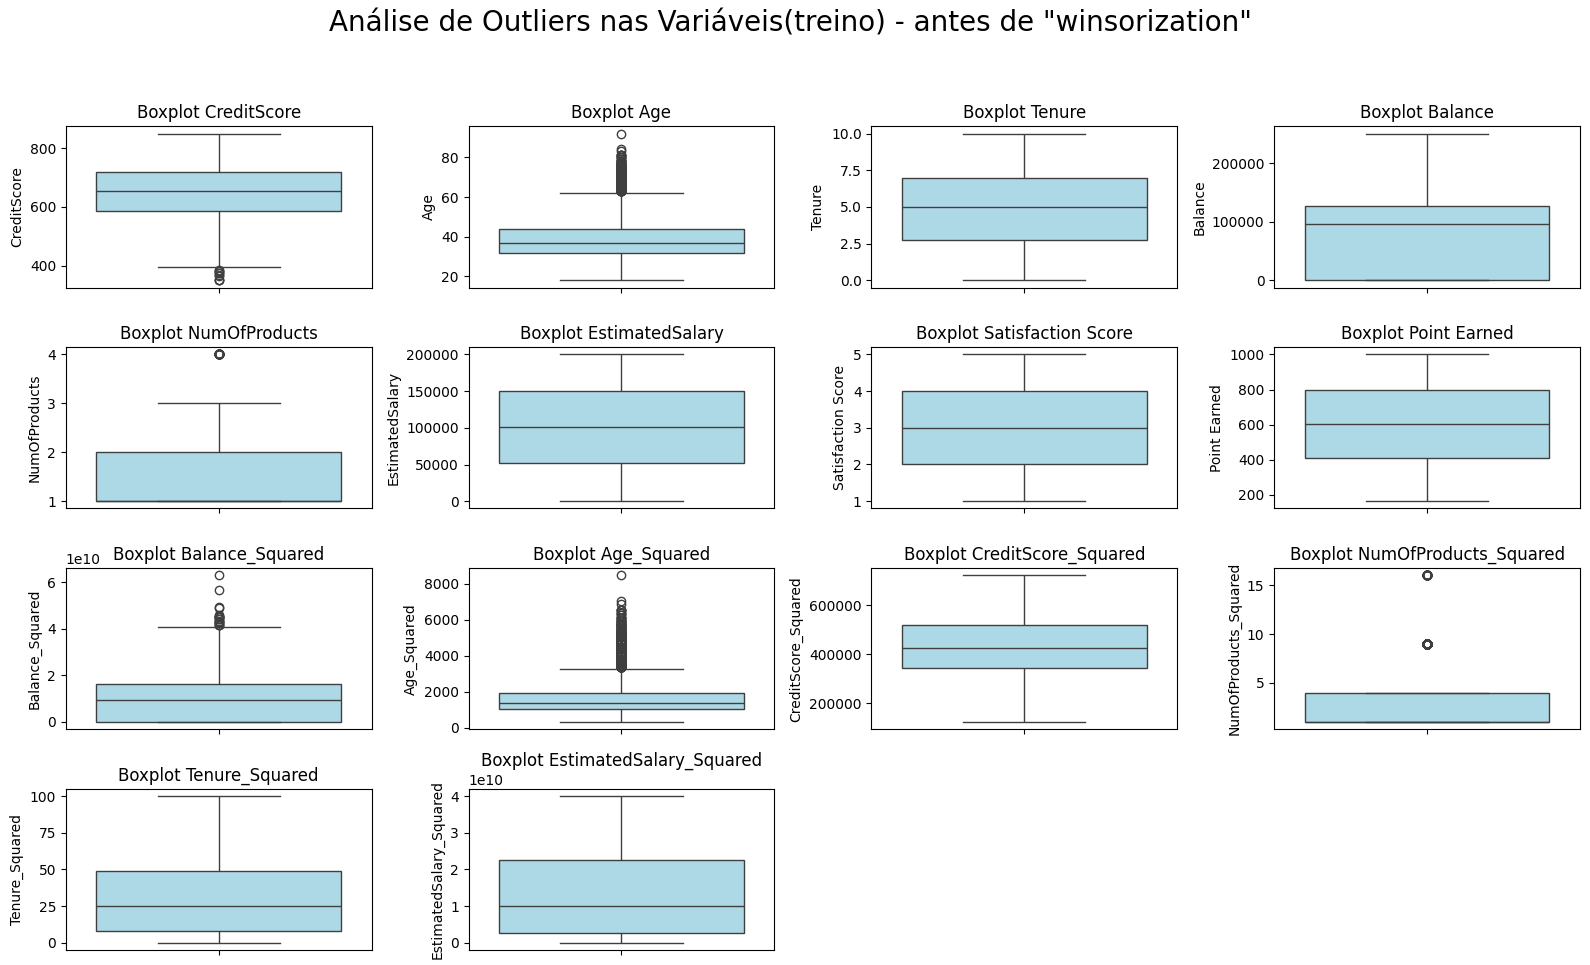

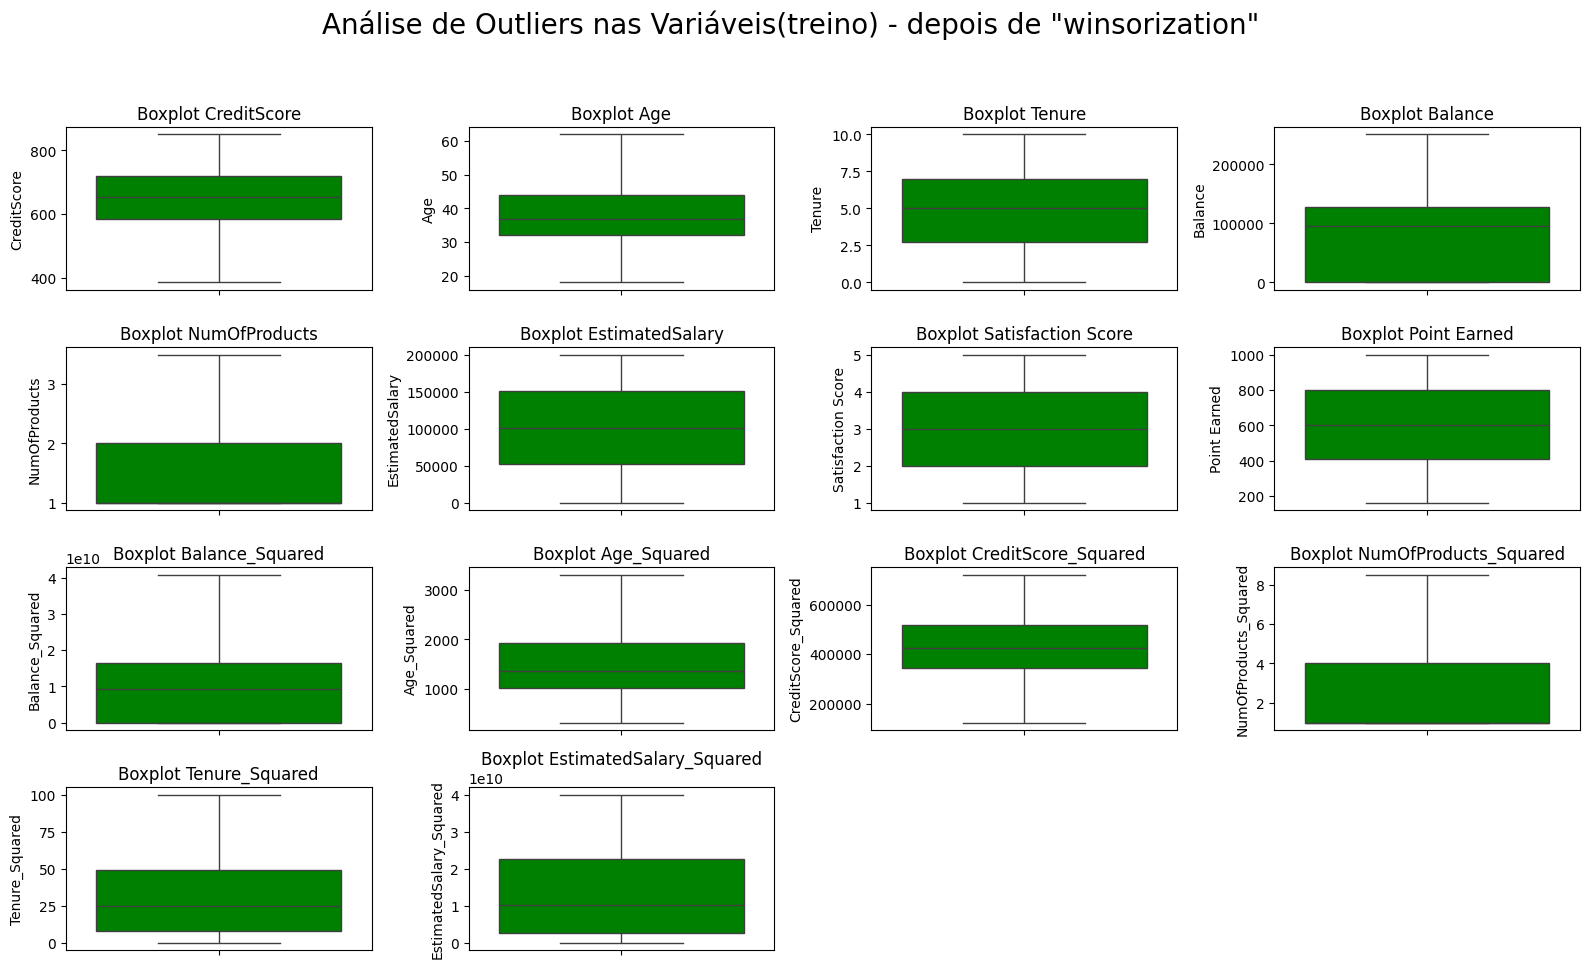

In [14]:
#%% analise de outliers das variaveis na base de treino 


###############antes de tratamento############################# 
variaveis = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary',
    'Satisfaction Score',
    'Point Earned',
    #QUADRATICAS
    'Balance_Squared',
    'Age_Squared',
    'CreditScore_Squared',
    'NumOfProducts_Squared',
    'Tenure_Squared',
    'EstimatedSalary_Squared'
]


# definindo tamnhos de subplots 
plt.figure(figsize=(16, 12))

# loop de criacao de boxplots para cada variavel 
for i, var in enumerate(variaveis):
    plt.subplot(5, 4, i + 1)  #determina a grade de plots 
    sns.boxplot(y=teste_multco_treino[var],
               boxprops=dict(facecolor='lightblue'))  # Cor interna do boxplot 
    plt.title(f'Boxplot {var}', fontsize=12)
    
#  título geral
plt.suptitle('Análise de Outliers nas Variáveis(treino) - antes de "winsorization" ', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajuste de layout
plt.show()
###############################################################






# Função que aplica winsorization
def tratar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    # Substitui outliers pelo limite inferior ou superior
    df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
    df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])





###############depois de tratamento############################# 

# Aplicando a função nas variáveis 
variaveis_para_tratar = ['CreditScore',
                        'Age',
                        'Tenure',
                        'Balance',
                        'NumOfProducts',
                        'EstimatedSalary',
                        'Satisfaction Score',
                        'Point Earned',
                        #QUADRATICAS
                        'Balance_Squared',
                        'Age_Squared',
                        'CreditScore_Squared',
                        'NumOfProducts_Squared',
                        'Tenure_Squared',
                        'EstimatedSalary_Squared'
                         ]
for variavel in variaveis_para_tratar:
    tratar_outliers(teste_multco_treino, variavel)


# subplot
plt.figure(figsize=(16, 12))



# loop de criacao de boxplots para cada variavel 
for i, var in enumerate(variaveis):
    plt.subplot(5, 4, i + 1)  #determina a grade de plots 
    sns.boxplot(y=teste_multco_treino[var],
               boxprops=dict(facecolor='green'))  # Cor interna do boxplot
    plt.title(f'Boxplot {var}', fontsize=12)
########################################################################


# título geral
plt.suptitle('Análise de Outliers nas Variáveis(treino) - depois de "winsorization" ', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # ajusta layout
plt.show()

* verificando as bases de treino e teste uma ultima vez para garantir que estao corretas 


In [15]:
#BASE DE TREINO 
teste_multco_treino

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Balance_Squared,Age_Squared,CreditScore_Squared,NumOfProducts_Squared,Tenure_Squared,EstimatedSalary_Squared,Exited
9069,619.0,32.0,4.0,175406.13,2.0,172792.43,1.0,707.0,0,1,0,1,0,0,1,1,0,1,0,0,0,3.076731e+10,1024.0,383161.0,4.0,16.0,2.985722e+10,1
2603,643.0,34.0,7.0,160426.07,1.0,188533.11,3.0,806.0,1,0,0,1,0,1,0,1,0,0,1,0,0,2.573652e+10,1156.0,413449.0,1.0,49.0,3.554473e+10,0
7738,561.0,33.0,6.0,0.00,2.0,173680.39,3.0,220.0,1,0,1,0,1,0,0,0,1,1,0,0,0,0.000000e+00,1089.0,314721.0,4.0,36.0,3.016488e+10,0
1579,618.0,41.0,8.0,37702.79,1.0,195775.48,5.0,615.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1.421500e+09,1681.0,381924.0,1.0,64.0,3.832804e+10,0
5058,714.0,37.0,9.0,148466.93,2.0,151280.96,3.0,936.0,1,0,0,1,1,0,0,0,1,0,0,0,1,2.204243e+10,1369.0,509796.0,4.0,81.0,2.288593e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768.0,54.0,8.0,69712.74,1.0,69381.05,3.0,569.0,0,1,0,1,1,0,0,0,1,0,0,0,1,4.859866e+09,2916.0,589824.0,1.0,64.0,4.813730e+09,0
5191,682.0,58.0,1.0,0.00,1.0,706.50,4.0,709.0,0,1,0,1,1,0,0,1,0,0,0,1,0,0.000000e+00,3304.0,465124.0,1.0,1.0,4.991422e+05,0
5390,735.0,38.0,1.0,0.00,3.0,92220.12,5.0,678.0,1,0,1,0,1,0,0,1,0,0,0,0,1,0.000000e+00,1444.0,540225.0,8.5,1.0,8.504551e+09,1
860,667.0,43.0,8.0,190227.46,1.0,97508.04,3.0,680.0,0,1,1,0,1,0,0,0,1,1,0,0,0,3.618649e+10,1849.0,444889.0,1.0,64.0,9.507818e+09,1


In [16]:
# BASE DE TESTE
base_corrige_teste = pd.concat([X_test,y_test], axis = 1)
base_corrige_teste


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Balance_Squared,Age_Squared,CreditScore_Squared,NumOfProducts_Squared,Tenure_Squared,EstimatedSalary_Squared,Exited
6252,596,32,3,96709.07,2,41788.37,1,709,1,0,1,0,0,1,0,0,1,0,1,0,0,9.352644e+09,1024,355216,4,9,1.746268e+09,0
4684,623,43,1,0.00,2,146379.30,2,508,0,1,0,1,1,0,0,0,1,0,0,0,1,0.000000e+00,1849,388129,4,1,2.142690e+10,0
1731,601,44,4,0.00,2,58561.31,1,281,0,1,1,0,0,0,1,1,0,0,1,0,0,0.000000e+00,1936,361201,4,16,3.429427e+09,0
4742,506,59,8,119152.10,2,170679.74,2,979,0,1,0,1,0,1,0,0,1,0,0,0,1,1.419722e+10,3481,256036,4,64,2.913157e+10,0
4521,560,27,7,124995.98,1,114669.79,5,457,0,1,0,1,0,0,1,1,0,0,0,0,1,1.562400e+10,729,313600,1,49,1.314916e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,731,39,2,126816.18,1,74850.93,1,403,0,1,0,1,0,0,1,1,0,0,0,0,1,1.608234e+10,1521,534361,1,4,5.602662e+09,0
1074,535,31,7,111855.04,2,36278.89,1,467,0,1,0,1,1,0,0,1,0,1,0,0,0,1.251155e+10,961,286225,4,49,1.316158e+09,0
3063,609,32,7,71872.19,1,151924.90,2,484,0,1,0,1,1,0,0,0,1,0,0,0,1,5.165612e+09,1024,370881,1,49,2.308118e+10,0
6487,580,31,2,0.00,2,64014.24,1,316,1,0,0,1,1,0,0,0,1,0,0,1,0,0.000000e+00,961,336400,4,4,4.097823e+09,0


# Modelagem: aplicando MLP Classifier com Scikit-learn 

* 

* 


* Uma MLP (Multilayer Perceptron) é um tipo de rede neural artificial composta por múltiplas camadas de neurônios, usada principalmente para tarefas de classificação e regressão.




1️. **Pré-processamento e Preparação dos Dados:**
* definir X_train e y_train;

2️. **Seleção de Features com Random Forest:**
* Modelo Random Forest treinado para identificar variáveis mais relevantes;
* variaveis com importancia observada maior que 0.01 foram selecionadas para participarem do modelo;

3️. **Escalonamento dos Dados:**
* StandardScaler para normalizar as features selecionadas ( X_train e X_test);



------------------------
MLP - Classifier
------------------------
------------------------
Início: 2025-02-22 04:22:12.487897
------------------------
Índices de X_test e y_test já estavam alinhados.


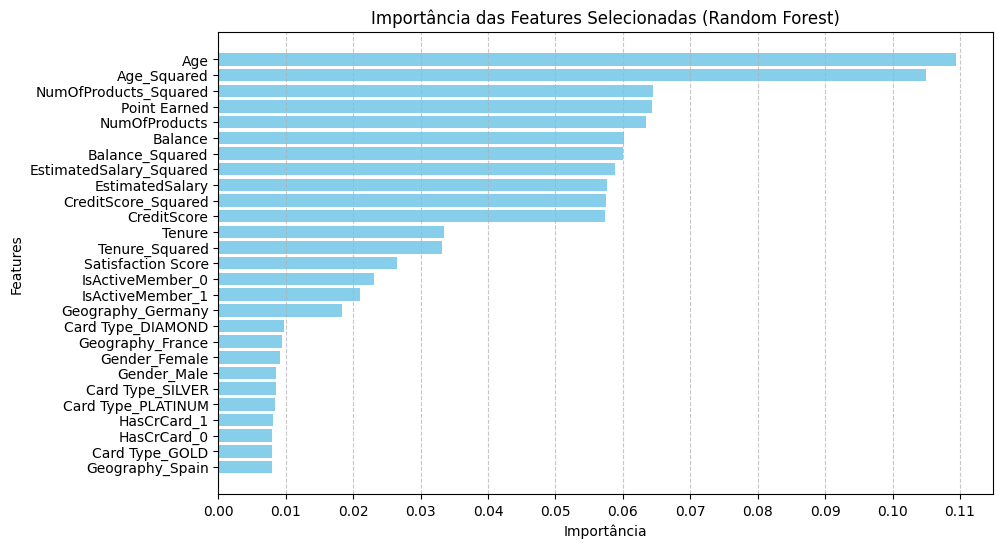

Processando tensores: 100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 497.66it/s]

X_train_mlp shape: (7000, 17)
y_train_mlp shape: (7000,)
X_test_mlp shape: (3000, 17)
y_test_mlp shape: (3000,)


In [17]:
print('------------------------')
print("MLP - Classifier")
print('------------------------')

# Desativando os warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module='torch')
warnings.filterwarnings("ignore", category=UserWarning, module='optuna')
warnings.filterwarnings("ignore", category=FutureWarning, module='optuna')
warnings.filterwarnings('ignore', category=DeprecationWarning)
logging.getLogger("optuna").setLevel(logging.CRITICAL)



# início
start_time_utc = datetime.utcnow() - timedelta(hours=3)
print('------------------------')
print("Início:", start_time_utc)
print('------------------------')


######################################## PRE-PROCESSAMENTO E PREPARACAO NOS DADOS ################################################################### 


# Defini variáveis de treinamento
X_train = teste_multco_treino.drop('Exited', axis=1)
y_train = teste_multco_treino['Exited']

# Verifica e conserta desalinhamento de índices caso tenha (X_test e y_test)
if not X_test.index.equals(y_test.index):
    print("Índices de X_test e y_test não estavam alinhados. Realinhando y_test.")
    y_test = y_test.loc[X_test.index]
else:
    print("Índices de X_test e y_test já estavam alinhados.")

# Concatena os dados corrigidos para criar a base de teste
base_corrige_teste = pd.concat([X_test, y_test], axis=1)

# Redefini X_test e y_test com índices corrigidos e verificados
X_test = base_corrige_teste.drop('Exited', axis=1)
y_test = base_corrige_teste['Exited']




# Criar e treinar o modelo Random Forest para selecionar as melhores variaveis 

# Mais estavel que o mutual_info_classif e melhor que ANOVA
# (ele captura bem relacoes nao lineares e nao sofre variacoes como mutual_info)

#detalhe importante, nao tem predict(), somente o fit() 


rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Obter a importância das features
feature_importances = rf.feature_importances_

# Criar DataFrame com os nomes das features e suas importâncias
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Filtrar features com importância maior que 0.01 (ou outro threshold desejado)
selected_features = feature_df[feature_df['Importance'] > 0.01]['Feature'].tolist()

# Ordenar as features pela importância (do menor para o maior)
feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features Selecionadas (Random Forest)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(feature_df['Importance'])+0.01, 0.01))
# Mostrar o gráfico
plt.show()



# Aplicar a seleção das mesmas features ao conjunto de treino e teste
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

bar = tqdm(total=1, desc="Processando tensores", ncols=100, position=0) #barra de progresso plotada, ajuda a monitorar

# arrays para o MLP 
X_train_mlp = X_train_selected  
y_train_mlp = y_train.values 
X_test_mlp = X_test_selected
y_test_mlp = y_test.values

bar.update(1) #incrementa barra
bar.close()#fecha barra

# Verificando os shapes dos tensores depois de criados e dispositivo ativado em cada um, 
# para ter certeza da compatibilidade de processamento e tamanho
print(f"X_train_mlp shape: {X_train_mlp.shape}")
print(f"y_train_mlp shape: {y_train_mlp.shape}")
print(f"X_test_mlp shape: {X_test_mlp.shape}")
print(f"y_test_mlp shape: {y_test_mlp.shape}")

5. **Definição da Arquitetura do Modelo (MLP - Classifier):**

* 

6. **Otimização de Hiperparâmetros com GridSearch:**

* 

7. **Validação Cruzada com Stratified K-Fold:** 

* Divisão dos dados em folds estratificados;


8. **Métricas de Avaliação dentro do fluxo de melhoria:** 
* AUC-ROC: Avaliação da separabilidade entre classes;
* Recall: Importante para classificar corretamente a classe minoritária;
* F1-Score: Equilíbrio entre precisão e recall ( é calculado mas nao usado para otimizar, nao afetou muito coloca-la a principio).

Grid Search Progress:   0%|          | 0/4096 [00:00<?, ?it/s]

Fitting 5 folds for each of 2048 candidates, totalling 10240 fits


Grid Search Progress:  50%|█████     | 2048/4096 [14:35<14:35,  2.34it/s]



🔹 Melhores hiperparâmetros encontrados: {'mlp__activation': 'relu', 'mlp__alpha': 0.0013, 'mlp__batch_size': 42, 'mlp__beta_1': 0.9, 'mlp__beta_2': 0.99, 'mlp__epsilon': 1.3e-08, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'adaptive', 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 200, 'mlp__momentum': 0.9, 'mlp__n_iter_no_change': 6, 'mlp__nesterovs_momentum': True, 'mlp__random_state': 42, 'mlp__shuffle': True, 'mlp__solver': 'adam', 'mlp__validation_fraction': 0.2}


Training Progress: 100%|██████████| 200/200 [02:01<00:00,  1.65it/s]


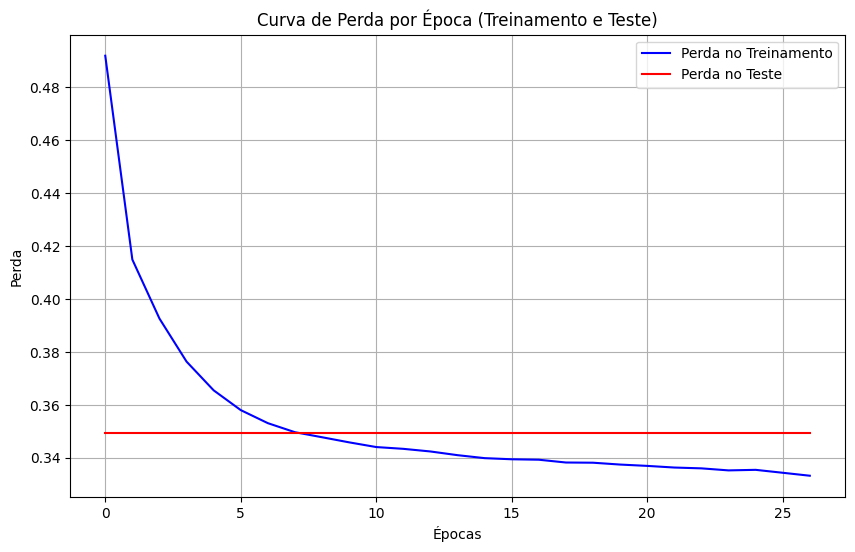

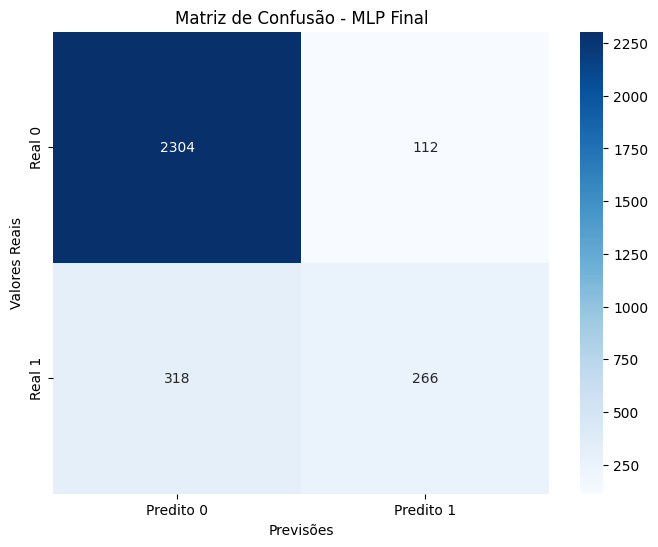

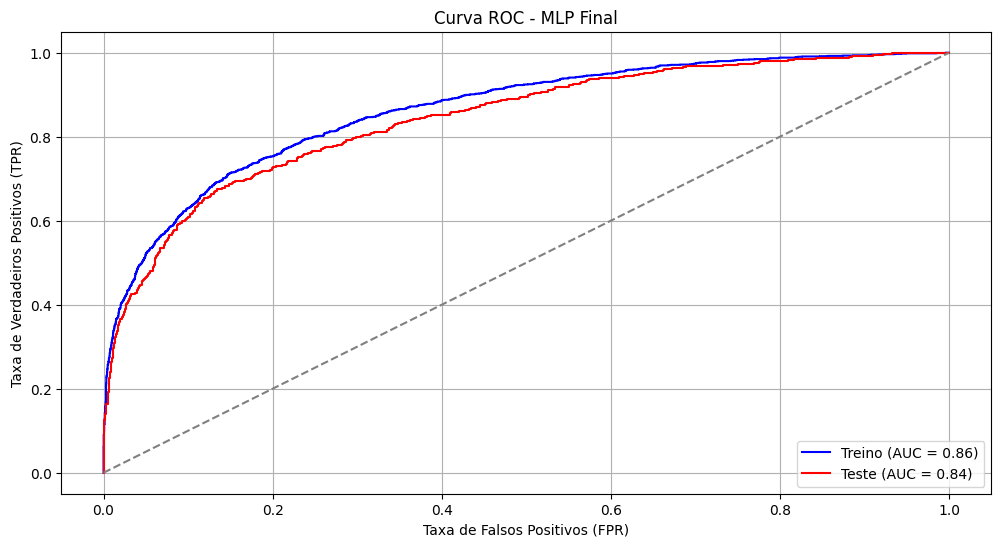


📊 MÉTRICAS DO MODELO FINAL
Métrica              Treino          Teste          
------------------------------------------------------------
Acurácia            0.8613         0.8567
Precisão            0.7622         0.7037
Recall              0.4828         0.4555
F1                  0.5912         0.5530
AUC ROC             0.8629         0.8429
MCC                 0.5320         0.4881
Kappa               0.5126         0.4723
Acurácia Balanceada 0.7217         0.7046
------------------------
Início: 2025-02-22 04:22:12.487897
Fim:    2025-02-22 04:38:52.903674
------------------------


In [ ]:

# Criando pipeline com MLP e normalização
pipeline = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(random_state=42))])

# Definição da grade de hiperparâmetros para busca
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],  # Adicionando uma opção extra de tamanho de camada
    'mlp__activation': ['relu'],  # Mantendo uma única ativação
    'mlp__learning_rate_init': [0.001, 0.0039],  # Novo valor 30% maior que 0.003
    'mlp__alpha': [0.001, 0.0013],  # Novo valor 30% maior que 0.001
    'mlp__batch_size': [32, 42],  # Novo valor 30% maior que 32
    'mlp__solver': ['adam'],  # Mantendo um solver fixo
    'mlp__momentum': [0.9, 1.17],  # Novo valor 30% maior que 0.9
    'mlp__nesterovs_momentum': [True],  # Mantendo uma opção fixa
    'mlp__max_iter': [200, 250],  # Usando um número fixo de iterações
    'mlp__n_iter_no_change': [5, 6],  # Novo valor 30% maior que 5
    'mlp__learning_rate': ['adaptive'],  # Mantendo um valor fixo
    'mlp__validation_fraction': [0.2, 0.3],  # Novo valor 30% maior que 0.1
    'mlp__beta_1': [0.9, 1.17],  # Novo valor 30% maior que 0.9
    'mlp__beta_2': [0.99, 1.29],  # Novo valor 30% maior que 0.99
    'mlp__epsilon': [1e-8, 1.3e-8],  # Novo valor 30% maior que 1e-8
    'mlp__shuffle': [True],  # Mantendo uma opção fixa
    'mlp__random_state': [42]  # Reprodutibilidade
}

# Validação cruzada estratificada
cv = StratifiedKFold(n_splits=5)

# Calcular o número total de combinações no GridSearch (Multiplicando as opções de cada parâmetro)
total_combinations = 1
for param in param_grid.values():
    total_combinations *= len(param)

# GridSearch com validação cruzada
grid_search = GridSearchCV(
    estimator=pipeline, param_grid=param_grid,
    cv=cv, n_jobs=-1, scoring='f1', verbose=1
)

# Usando tqdm para barra de progresso no GridSearch (com base no número total de combinações)
with tqdm(total=total_combinations * len(param_grid['mlp__max_iter']), desc="Grid Search Progress") as pbar:
    def update_pbar(*args, **kwargs):
        pbar.update(1)

    # Atribuindo a função de callback para o progresso durante o GridSearch
    grid_search.fit(X_train_mlp, y_train_mlp)
    pbar.update(total_combinations)  # Atualiza a barra de progresso ao final do GridSearch

# Obtendo os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("\n🔹 Melhores hiperparâmetros encontrados:", best_params)

# **TREINAMENTO FINAL USANDO OS MELHORES HIPERPARÂMETROS**
best_mlp_final = MLPClassifier(
    hidden_layer_sizes=best_params['mlp__hidden_layer_sizes'],
    activation=best_params['mlp__activation'],
    learning_rate_init=best_params['mlp__learning_rate_init'],
    alpha=best_params['mlp__alpha'],
    max_iter=best_params['mlp__max_iter'],
    solver=best_params['mlp__solver'],
    momentum=best_params['mlp__momentum'],
    nesterovs_momentum=best_params['mlp__nesterovs_momentum'],
    batch_size=best_params['mlp__batch_size'],
    n_iter_no_change=best_params['mlp__n_iter_no_change'],
    learning_rate=best_params['mlp__learning_rate'],
    validation_fraction=best_params['mlp__validation_fraction'],
    beta_1=best_params['mlp__beta_1'],
    beta_2=best_params['mlp__beta_2'],
    epsilon=best_params['mlp__epsilon'],
    shuffle=best_params['mlp__shuffle'],
    random_state=42,  # Reprodutibilidade
    early_stopping=True
)

# Normalizando os dados manualmente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_mlp)
X_test_scaled = scaler.transform(X_test_mlp)

# Usando tqdm para barra de progresso no treinamento final
with tqdm(total=best_params['mlp__max_iter'], desc="Training Progress") as pbar:
    for epoch in range(best_params['mlp__max_iter']):
        best_mlp_final.fit(X_train_scaled, y_train_mlp)
        pbar.update(1)  # Atualiza a barra a cada época do treinamento
        
# Inicializando listas para armazenar as perdas
train_losses = best_mlp_final.loss_curve_
test_losses = []

# Calculando a perda no conjunto de teste por época
for epoch in range(1, len(train_losses) + 1):
    test_loss = log_loss(y_test_mlp, best_mlp_final.predict_proba(X_test_scaled))
    test_losses.append(test_loss)

# Plotando as curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perda no Treinamento', color='blue')
plt.plot(test_losses, label='Perda no Teste', color='red')
plt.title('Curva de Perda por Época (Treinamento e Teste)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

# Defina o limiar desejado
threshold = 0.5  # Limiar de classificação

# Predições para métricas
y_pred_train_proba = best_mlp_final.predict_proba(X_train_scaled)[:, 1]  # Probabilidade da classe 1
y_pred_test_proba = best_mlp_final.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe 1

# Aplicando o limiar para classificar
y_pred_train = (y_pred_train_proba >= threshold).astype(int)
y_pred_test = (y_pred_test_proba >= threshold).astype(int)

# Cálculo das métricas
accuracy_train = accuracy_score(y_train_mlp, y_pred_train)
accuracy_test = accuracy_score(y_test_mlp, y_pred_test)

precision_train = precision_score(y_train_mlp, y_pred_train)
precision_test = precision_score(y_test_mlp, y_pred_test)

recall_train = recall_score(y_train_mlp, y_pred_train)
recall_test = recall_score(y_test_mlp, y_pred_test)

f1_train = f1_score(y_train_mlp, y_pred_train)
f1_test = f1_score(y_test_mlp, y_pred_test)

fpr_train, tpr_train, _ = roc_curve(y_train_mlp, y_pred_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test_mlp, y_pred_test_proba)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

mcc_train = matthews_corrcoef(y_train_mlp, y_pred_train)
mcc_test = matthews_corrcoef(y_test_mlp, y_pred_test)

kappa_train = cohen_kappa_score(y_train_mlp, y_pred_train)
kappa_test = cohen_kappa_score(y_test_mlp, y_pred_test)

balanced_accuracy_train = balanced_accuracy_score(y_train_mlp, y_pred_train)
balanced_accuracy_test = balanced_accuracy_score(y_test_mlp, y_pred_test)

# Cálculo da matriz de confusão
conf_matrix = confusion_matrix(y_test_mlp, y_pred_test)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predito 0', 'Predito 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusão - MLP Final')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

# Plotando a curva ROC
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Treino (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Teste (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC - MLP Final')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Exibir as métricas finais
print("\n📊 MÉTRICAS DO MODELO FINAL")
print("="*60)
print(f"{'Métrica':<20} {'Treino':<15} {'Teste':<15}")
print("-"*60)
print(f"Acurácia            {accuracy_train:.4f}         {accuracy_test:.4f}")
print(f"Precisão            {precision_train:.4f}         {precision_test:.4f}")
print(f"Recall              {recall_train:.4f}         {recall_test:.4f}")
print(f"F1                  {f1_train:.4f}         {f1_test:.4f}")
print(f"AUC ROC             {roc_auc_train:.4f}         {roc_auc_test:.4f}")
print(f"MCC                 {mcc_train:.4f}         {mcc_test:.4f}")
print(f"Kappa               {kappa_train:.4f}         {kappa_test:.4f}")
print(f"Acurácia Balanceada {balanced_accuracy_train:.4f}         {balanced_accuracy_test:.4f}")




# Fim
end_time_utc = datetime.utcnow() - timedelta(hours=3)
print('------------------------')
print("Início:", start_time_utc)
print("Fim:   ", end_time_utc)
print('------------------------')

